In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
import sys# Start writing code here...
sys.path.append('/datasets/gdrive/170 Project/project')


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from starter import *
import itertools
# inp_dir = '/datasets/gdrive/170 Project/project/inputs'
# out_dir = '/datasets/gdrive/170 Project/project/outputs'
inp_dir = 'inputs'
out_dir = 'output'

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def new_cost_p(b, norm_b, i, j, V):
    new_norm_b_squared = norm_b**2 - b[i]**2 - b[j]**2 + (b[i]-1/V)**2 + (b[i]+1/V)**2
    new_norm_b = new_norm_b_squared ** 0.5
    cost_p = math.exp(70*new_norm_b)
    return cost_p, new_norm_b

In [4]:
def new_cost_w(G, u, i, j, old_cost_w):
    for v in G[u]:
        if G.nodes[v]['team'] == i:
            old_cost_w -= G[u][v]['weight']
        elif G.nodes[v]['team'] == j:
            old_cost_w += G[u][v]['weight']
    return old_cost_w

In [5]:
def k_way_random_part(V, k):
    return np.random.randint(k, size=V) + 1 # +1 as partition=0 is illegal

In [49]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    for v in G:
        G.nodes[v]['team'] = v % 2 + 1
    return G

In [139]:
def run(solver, in_file: str, out_file: str, overwrite: bool=False, testing: bool=False, scores = []):
    instance = read_input(in_file)
    output = solver(instance)

    if testing:
        solve_score = score(output)
        scores.append(solve_score)
    if output:
        instance = output
    if not testing:
        write_output(instance, out_file, overwrite)
    # print(f"{str(in_file)}: cost", score(instance))

def save_and_plot(files, scores, output_name):
    counts, bins = np.histogram(scores)
    plt.stairs(counts, bins)
    
    scores_and_names = list(zip(files, scores))
    scores_and_names.sort()
    cat_size = len(scores)//3
    
    second = lambda x: x[1]
    large = sum(map(second, scores_and_names[:cat_size]))/cat_size
    medium = sum(map(second, scores_and_names[cat_size:cat_size*2]))/cat_size
    small =  sum(map(second, scores_and_names[cat_size*2:]))/cat_size
    
    f = open('scores/' + output_name + '/avg_scores.txt', "w")
    f.write("small_avg: {0} \nmedium_avg: {1} \nlarge_avg: {2}".format(small, medium, large))
    f.close()
    
    df = pd.DataFrame(zip(files, scores), columns=['name', 'score'])
    os.makedirs('scores/' + output_name, exist_ok=True)  
    df.to_csv('scores/' + output_name + '/out.csv')
    

def run_all(solver, in_dir, out_dir, output_name, overwrite: bool=False, testing: bool=False):
    scores = []
    files = []
    for file in tqdm([x for x in os.listdir(in_dir) if x.endswith('.in')]):
        run(solver, str(Path(in_dir) / file), str(Path(out_dir) / f"{file[:-len('.in')]}.out"), overwrite, testing, scores)
        files.append(file)
    if testing:
        save_and_plot(files, scores, output_name)

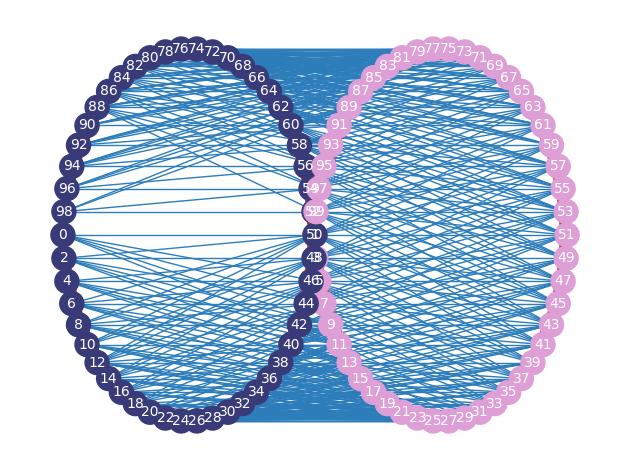

89760.8281828459

In [140]:
G = read_input('test_inputs/small.in')
solve(G)
validate_output(G)
visualize(G) 
score(G)

In [141]:
run(solve, 'test_inputs/small.in', 'test_outputs/small.out', overwrite=True)

100%|██████████| 780/780 [00:09<00:00, 84.73it/s] 


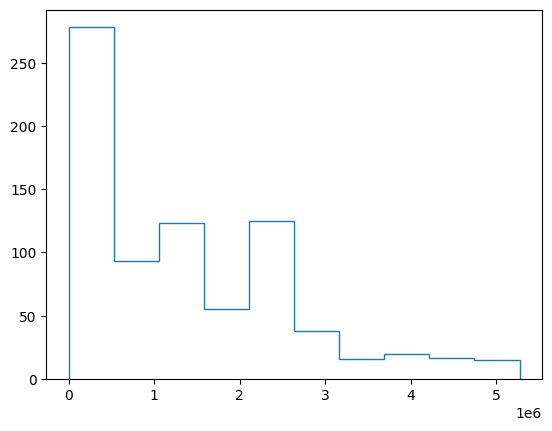

In [142]:
run_all(solve, 'inputs', 'outputs', output_name='test_solver', overwrite=True, testing=True)

In [143]:
tar('output', overwrite=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=beec2354-b280-46f2-b093-65afd3bc9b88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>